In [2]:
%pylab inline
import numpy as np
from scipy import fft, ifft
import matplotlib.pyplot as plt
import cmath

Populating the interactive namespace from numpy and matplotlib


Some commands to run:
$\newcommand{\eps}{\varepsilon} \renewcommand{\s}{\sigma} \newcommand{\E}{\mathbb{E}} \newcommand{\P}{\mathbb{P}}$
$\newcommand{\F}{\mathcal{F}} \newcommand{\half}{\frac{1}{2}} \newcommand{\R}{\mathbb{R}} \newcommand{\Z}{\mathbb{Z}} $
$\newcommand{\a}{\alpha} $

# General Instructions

* You have to explain mathematically how you will code a requested formula or mathematical expression (e.g. $c_n(f)$ or $a_n(f), b_n(f)$).
* Use FFT each time it can possibly be used
* Code for Problem 1 can be re-used for Problem 2
* Comment your code
* use np.random.seed(42), 42 is an example,  so that you're results are reproducable when simulating random quantities.

## Problem 1: Fourier Series Localization (15 points)

Consider the function $f(x) = x^2$ for $x \in [-1,1]$ extended by periodicity,
Further consider the function $g(x) = x^2$ for $x \in [-1/4, 1/4]$ and extended linearly to $[-1, 1]$ such that $g(t)$ is $C^1$.

Under such situation, we have $|S_N^f(x) - S_N^g(x)| \to |f(x) - g(x)|$ as $N \to +\infty$ and for $x \in [-1/4, 1/4]$, the difference is actually $0$, although the Fourier coefficients of $f$ and $g$ are all different because they depend on their respective function over the whole interval $[-1,1]$.

0. Plot $f$ and $g$ on $[-1,1]$ with 1000 points.
1. [5 points] Compute numerically, using fft, the Fourier coefficients $c_n(f)$ and $c_n(g)$ and compare them for $N=11$, $N=21$ and $N=101$.
2. [5 points] Plot comparison of $S_N^f(x)$ with $f(x)$ on $[-1,1]$ with 101 points.
3. [5 points] Same with $S_N^g(x)$ and $g(x)$


In [3]:
#0
def f(x):
    return x ** 2

def g(x):
    if x >= -1/4 and x <= 1/4:
        g = x ** 2
    elif x < -1/4:
        g = -x/2 - 1/16
    else:
        g = x/2 - 1/16
    return g


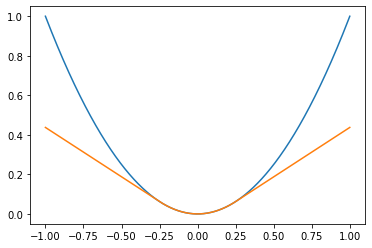

In [4]:
xlist = np.linspace(-1, 1, 1001)
plt.plot(xlist, [f(x) for x in xlist],xlist, [g(x) for x in xlist])
plt.show()

In [5]:
#1
f_fft_11 = fft.fft(np.array([f(x) for x in np.linspace(-1,1,11)]))
f_fft_21 = fft.fft(np.array([f(x) for x in np.linspace(-1,1,21)]))
f_fft_101 = fft.fft(np.array([f(x) for x in np.linspace(-1,1,101)]))
g_fft_11 = fft.fft(np.array([g(x) for x in np.linspace(-1,1,11)]))
g_fft_21 = fft.fft(np.array([g(x) for x in np.linspace(-1,1,21)]))
g_fft_101 = fft.fft(np.array([g(x) for x in np.linspace(-1,1,101)]))

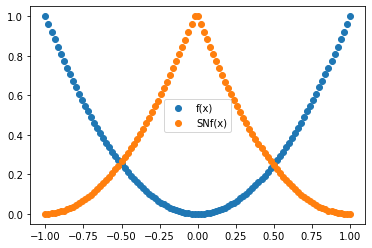

In [7]:
#2
n_ = 51
f_coef = np.zeros((n_,2))

def compute(x, f_coef):
    result = -f_coef[0,0] / 2
    for n in range(len(f_coef)):
        result += (f_coef[n, 0] * np.cos(np.pi * n * x) + f_coef[n, 1] * np.sin(np.pi * n * x))
    return result

for i in range( n_):
    a = 2 * f_fft_101[i].real
    b = -2 * f_fft_101[i].imag
    f_coef[i][0] = a
    f_coef[i][1] = b

FFT_result = compute(np.linspace(-1,1,101) +1  , f_coef/101)
plt.scatter(np.linspace(-1,1,101), [f(x) for x in np.linspace(-1,1,101)], label = 'f(x)')
plt.scatter(np.linspace(-1,1,101), FFT_result, label = 'SNf(x)')
plt.legend()

In [131]:
np.zeros((4,4))[1,1]

0.0

In [132]:
g_coef = np.zeros((n_,2))
for i in range( n_):
    a = 2 * g_fft_101[i].real
    b = -2 * g_fft_101[i].imag
    g_coef[i][0] = a
    g_coef[i][1] = b

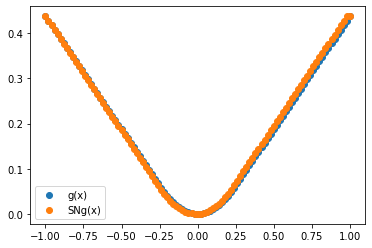

In [133]:
FFT_result_g = compute(np.linspace(-1,1,101) + 1 , g_coef/101)
plt.scatter(np.linspace(-1,1,101), [g(x) for x in np.linspace(-1,1,101)], label = 'g(x)')
plt.scatter(np.linspace(-1,1,101), FFT_result_g, label = 'SNg(x)')
plt.legend()

## Problem 2: Convergence at Discountinuity Points and Gibbs Effect (20 points)

Consider the see saw function $f(x) = x$ for $x \in [-1, 1]$.

0. Compute the analytic expression of the Fourier coeficients of of $f$
1. [5 points] Compute numerically the Fourier coefficients of $f$ from $-N/2$ to $N/2$ for $N=21$, $N=51$, $N=101$ and compare to analytical values.
2. [5 points] Compute numerically an estimate of $sup_{x\in (0,1)}|f(x) - S_N^f(x)|$ as $N$ increases as above. What is happening?
3. [5 points] Plot for $x \in [-3, 3]$ the convergence of $S_N^f$ to $f$. Confirm the comment from the previous question.
4. [5 points] Compute numerically $S_N^f(1)$ as $N$ increases from $N=10$ to $N=1000$ by step of size $10$.

Fourier coefficient for A are all zeros since it's a odd function

In [134]:
#0
def F_coef_B(n):
    return - 2 * ((-1) ** n)/ (n * np.pi)

In [135]:
#1
def f(x):
    if x >= -1 and x <= 1:
        f = x 
    elif x < -1:
        f = x + 2
    else:
        f = x - 2
    return f

list_21 = [f(x) for x in np.linspace(-1, 1, 21)]
list_51 = [f(x) for x in np.linspace(-1, 1, 51)]
list_101 = [f(x) for x in np.linspace(-1, 1, 101)]
fft_21 = fft.fft(list_21)
fft_51 = fft.fft(list_51)
fft_101 = fft.fft(list_101)
An_21 = np.zeros(11)
An_51 = np.zeros(26)
An_101 = np.zeros(51)
Bn_21 = np.zeros(11)
Bn_51 = np.zeros(26)
Bn_101 = np.zeros(51)
for i in range(11):
    An_21[i]=(2 * fft_21[i].real/21)
    Bn_21[i]=(-2 * fft_21[i].imag/21 )
for i in range(26):
    An_51[i]=(2 * fft_51[i].real/51)
    Bn_51[i]=(-2 * fft_51[i].imag/51 )
for i in range(51):
    An_101[i]=(2 * fft_101[i].real/101)
    Bn_101[i]=(-2 * fft_101[i].imag/101 )


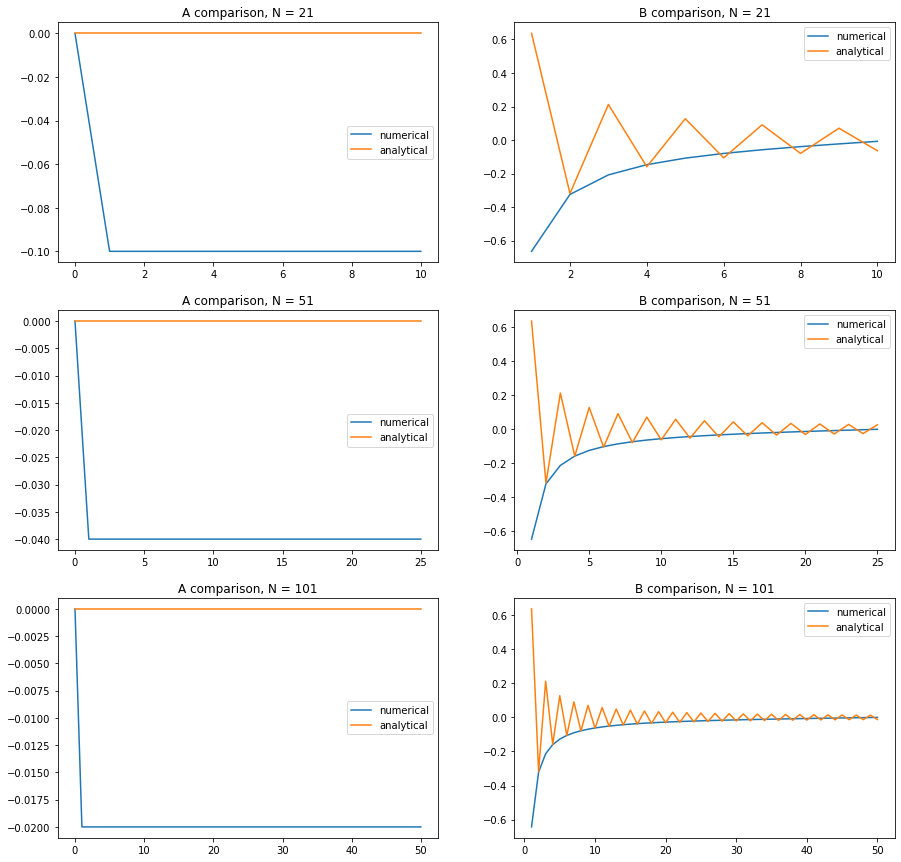

In [136]:
figure(figsize = [15, 15])
subplot(3,2,1)
plot(range(11), An_21, label = "numerical")
plot(range(11), np.zeros(11), label = "analytical")
title("A comparison, N = 21")
legend()

subplot(3,2,2)
plot(range(1,11), Bn_21[1:],label = "numerical")
plot(range(1,11), [F_coef_B(i) for i in range(1,11)], label = "analytical")
title("B comparison, N = 21")
legend()

subplot(3,2,3)
plot(range(26), An_51, label = "numerical")
plot(range(26), np.zeros(26), label = "analytical")
title("A comparison, N = 51")
legend()

subplot(3,2,4)
plot(range(1,26), Bn_51[1:], label = "numerical")
plot(range(1,26), [F_coef_B(i) for i in range(1,26)], label = "analytical")
title("B comparison, N = 51")
legend()

subplot(3,2,5)
plot(range(51), An_101, label = "numerical")
plot(range(51), np.zeros(51), label = "analytical")
title("A comparison, N = 101")
legend()

subplot(3,2,6)
plot(range(1,51), Bn_101[1:], label = "numerical")
plot(range(1,51), [F_coef_B(i) for i in range(1,51)], label = "analytical")
title("B comparison, N = 101")
legend()


In [137]:
#2

N_ = [21,51,101]
fft_ = [fft_21, fft_51, fft_101]
x_ = np.linspace(0.01,0.99,100)
max_diff = [0,0,0]
for i in range(3):
    N_temp = N_[i]
    f_temp = [f(k) for k in x_]
    
    n_temp = int((N_temp+1)/2)
    f_coef = np.zeros((N_temp,2))
    
    for n in range(n_temp):
        a = 2*fft_[i][n].real/N_[i]
        b = -2*fft_[i][n].imag/N_[i]
        f_coef[n,0] = a
        f_coef[n,1] = b
        
    FFT_result = compute(x_ + 1, f_coef)
    max_diff[i]=max(np.abs(FFT_result - f_temp))
print(max_diff)

[1.8291416982077722, 1.5418947620973844, 0.9783213800575341]


The difference decreases when N get larger  

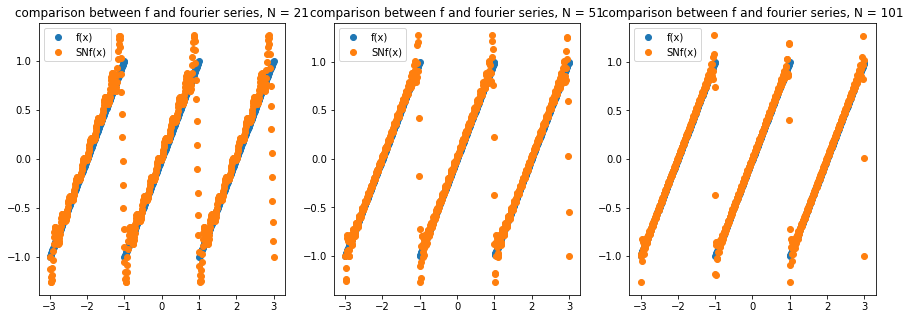

In [138]:
#3
N_ = [21,51,101]
fft_ = [fft_21, fft_51, fft_101]
x_ = np.linspace(-3,3,600)
f_temp = [f(k) for k in x_]
FFT_result = [0,0,0]

for i in range(3):
    N_temp = N_[i]
    n_temp = int((N_temp+1)/2)
    f_coef = np.zeros((N_temp,2))
    
    for n in range(n_temp):
        a = 2*fft_[i][n].real/N_[i]
        b = -2*fft_[i][n].imag/N_[i]
        f_coef[n,0] = a
        f_coef[n,1] = b
        
    FFT_result[i] = compute(x_ + 1, f_coef)

figure(figsize = [15, 5])    
subplot(1, 3, 1)
scatter(x_, f_temp, label = 'f(x)')
scatter(x_, FFT_result[0], label = 'SNf(x)')
title('comparison between f and fourier series, N = 21')
legend()

subplot(1, 3, 2)
scatter(x_, f_temp, label = 'f(x)')
scatter(x_, FFT_result[1], label = 'SNf(x)')
title('comparison between f and fourier series, N = 51')
legend()

subplot(1, 3, 3)
scatter(x_, f_temp, label = 'f(x)')
scatter(x_, FFT_result[2], label = 'SNf(x)')
title('comparison between f and fourier series, N = 101')
legend()

In [139]:
#4
Svalues = []
n = 10
while n < 1000:
    N = 2 * n + 1
    f_q4 = [f(x) for x in np.linspace(-1, 1, N)]
    ncoeffs = int((N + 1)/2)
    fft_q4 = fft.fft(f_q4)
    fcoeffs = []
    for i in range(ncoeffs):
        a = 2 * fft_q4[i].real
        b = -2 * fft_q4[i].imag
        fcoeffs.append([a,b])
    Svalues.append(rebuild(1,fcoeffs))
    n += 10

plt.plot([10*i for i in range(1,100)], Svalues);

NameError: name 'rebuild' is not defined

In [ ]:
n_=np.arange(10,1010,10)
nn = len(n_)
S = np.zeros(nn)
for i in range(nn):
    N_temp = 2 * n_[i] + 1
    f_temp = [f(x) for x in np.linspace(-1, 1, N_temp)]
    n_temp = n_[i] + 1
    fft_temp = fft.fft(f_temp)
    f_coef = np.zeros((N_temp,2))
    
    for n in range(n_temp):
        a = 2*fft_temp[n].real/N_temp
        b = -2*fft_temp[n].imag/N_temp
        f_coef[n,0] = a
        f_coef[n,1] = b
    S[i] = compute(1 , f_coef)
plt.plot(n_, S)   

## Problem 3: Smoothing (15 points)

* Simulate a Brownian Motion (BM) for $t \in [0,1]$ with $\sigma = 0.3$, sample with $\delta t = 1/252$.
* Use the Shannon-Nyquist formula to smooth observed path using $\delta = 10 \delta t$. (note that 10 could be a parameter to fine tune).
* Plot the resulting smoothing for $t \in [-0.1, 1.1]$ while having a flat-extrapolation for the simulated BM



In [ ]:
#1
T = 1
sig = 0.3
dt = 1/252
t0 = 0
bm = np.zeros(253)
for i in range(253):
    dW = np.random.normal() * np.sqrt(dt) * sig
    W = bm[i-1] + dW
    bm[i]=W
plt.plot(np.linspace(0,1,253),bm)    

In [ ]:
#2
Dt = 10 / 252
def Shannon(t):
    ans = 0
    for n in range(26):
        den = np.pi * (t / Dt - n)
        num = np.sin( den )
        xxx = bm[10 * n]
        
        if den == 0:
            ans += xxx
        else:
            ans += xxx * num/den
            
    return ans

smooth = [Shannon(t) for t in np.linspace(0,1,253)]
plot(np.linspace(0,1,253), smooth)
plot(np.linspace(0, 1, 253), bm)

In [ ]:
#3
l = [Shannon(t) for t in np.linspace(-0.1, 0, 100)]
r = [Shannon(t) for t in np.linspace(1  , 1.1,100)]

plot(np.linspace(-0.1,0,100), l)
plot(np.linspace(1,1.1,100), r)
plot(np.linspace(0,1,253), smooth)

## Problem 4: Shanoon Nyquist Truncation (25 points)

The purpose of the this problem is to test the Shannon-Nyquist formula when its assumption on $\hat f$ breaks.

Let's assume that the Fourier transform of some function $f_F$ has a compact support and is given by
$$ \hat f_F(t) = 1_{[-F, F]}(t) e^{-\half t^2} $$

so that $f_F(x) = \frac{1}{2 \pi} \int_\R \hat f_F(t) e^{-i tx } dt$.

Let's assume $F= 2$.

0. What is $f_{\infty}$ (i.e. $F=+\infty$) ?

1. [7 points] Use the FFT to compute $f(x)$ at some points $x_i$ for a number of points N=100.

2. [3 points] Derive an analytical expression for $f(x)$ and compare to the result from the previous question.

3. [15 points] Sample the function $f_{\infty}$ on the subset of points $x_i$ such taht $x_{i+1} - x_i = 1/(2F)$ and use the Shannon-Nyquist theorem to estimate the function $f$ at all points $x_i$ and compare to the results obtained in questions 1 or 2.

In [ ]:
#1
def f_(t,F):
    
    return np.exp((-t ** 2)/2) * (-F <= t <= F)

f_SN = [f_(x,2) for x in np.linspace(-2,2,100)]
f_fft = fft.ifft(f_SN)
f_fft

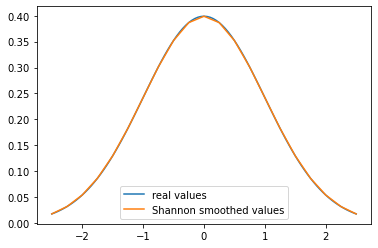

In [140]:
#3
def f_finite(x):
    
    return (1 / np.sqrt(2*np.pi))*np.exp((-1/2)*(x**2))

x_ = np.linspace(-2.5, 2.5, 21)
value = [f_finite(x) for x in np.linspace(-2.5,2.5,101)]
this = [f_finite(x) for x in x_]

def Shan_Ny(t):
    dt = 1/4
    result = 0
    for i in range(21):
        
        den = np.pi * ((t + 2.5)/dt - i)
        num = np.sin(den)
        xxx = this[i]
        
        if den == 0:
            result += xxx
        else:
            result += xxx * num / den
    return result

plot(np.linspace(-2.5,2.5,101), value, label = "real values")
plot(x_, [Shan_Ny(t) for t in x_ ], label = "Shannon smoothed values")
legend()

# Problem 5: Call function Fourier Transform (25 points)

Let's consider the function $f_\a(x) = (x-k)^+ e^{-\a x}$ with $(z)^+ = \max(0,z)$.

1. (2 pts) Under which condition $f_\a \in L^1(\R)$?
   Compute the analytic expression of the Fourier transform of $f_\a$ where we choose the definition
   $$ \hat f_\a(t) = \int_\R f_\a(x) e^{ixt}dx $$

2. (2 pts) Justify why we can use the Fourier inversion formula and state the result for $f_\a$.

3. (1 pts) Implement the function $f_\a$ and $\hat f_\a$ below.

4. (20 pts)Implement the Fourier inversion formula applied to $\hat f_\a$ and check the numerical accuracy with the analytical expression of $f_\a$ for (for instance) $\a = 0.1, 1., 3.$ and $k = 0.5, 0.8, 1., 1.2, 1.5$

Coding suggestions below for the last function are only suggestions.

In [151]:
def f_alpha(x,K,alpha):
    return (x - K > 0) * (x - K) * np.exp(-alpha * x)

def f_hat_alpha(y,K,alpha):
    i = complex(0,1)
    index = np.exp(-alpha* K) 
    a = complex(0,1) * (y**2)  - 2 * alpha * y - complex(0,1) * (alpha ** 2)
    b = (-y**2 - 2 * complex(0,1) * alpha * y + alpha**2)
    numm = a * np.sin(K* y) + b * np.cos(K * y)
    den = y**4 + 2*(alpha ** 2) * (y ** 2) + alpha**4
    num = index * numm
    return num/den

In [152]:
# given an integral trunction T and a number of points N
# compute the step size in the t-dimension and x-dimensino
# return corresponding grids of $t_k$ and $x_n$, $\Delta_T$, $\Delta_x$ and $x_min$
def generate_grid(T, N):
    DT = 2 * T/N
    x0 = N * np.pi/(2 * T)
    Dx = 2 * x0/N
    xn = [-x0 + n * Dx for n in range(N)]
    tk = [-T + k * DT for k in range(N)]
    return tk, xn,DT, Dx, x0

In [163]:
# compute the fourier inversion formula given the vector of values of $\hat f$
# the points x_n where to approximate f(x_n)
# the points t_k where the integral is discretized
# return approximation f(x_n) computed with an FFT algorithm
def inverse_FT(f_hat, x_grid, t_grid):
    ii = complex(0,1)
    n = len(t_grid)
    m = len(x_grid)
    
    x_hat = [np.exp(ii * x_grid[0] * t_grid[i]) * f_hat[i] for i in range(n)]
    f_x_fft = fft.ifft(x_hat)
    f_fft = np.array(f_x_fft) *np.array([2 * t_grid[-1] * np.exp(-ii * n * np.pi) for n in range(m)]) 
    return f_fft

In [170]:
results = []

N = 100
T = 5
tk, xn, DT,Dx,x0 = generate_grid(T, N)
a_ = [0.1,1,3]
k_ = [0.5,0.8,1,1.2,1.5]

for a in a_:
    temp = []
    for k in k_:
        f_hat = np.array([f_hat_alpha(t,k,a) for t in tk])
        f_fft = inverse_FT(f_hat, xn, tk)
        vals = np.array([f_alpha(x, k, a) for x in xn])
        real = np.array([f.real for f in f_fft])
        diff = real - vals
        mse = diff @ diff.T / len(diff)
        
        temp.append(mse)
    results.append(temp)

In [176]:
for i in range(3):
    print('a=', a_[i], results[i],'\n')

a= 0.1 [101.21359667211358, 95.41597963211706, 91.7392931023846, 88.20640239830458, 83.16165442888698] 

a= 1.0 [0.03890580307997437, 0.021237666026119956, 0.014274157044752607, 0.0096016443638554, 0.005238196771337709] 

a= 3.0 [0.00018388388657037042, 2.9769328193163695e-05, 8.68398714366164e-06, 2.8842424153933783e-06, 4.3431072540289896e-07] 



In [164]:
a=0.1
k=0.5
f_hat = np.array([f_hat_alpha(t,0.1,0.5) for t in tk])
f_fft = inverse_FT(f_hat, xn, tk)
vals = np.array([f_alpha(x, k, a) for x in xn])
real = np.array([f.real for f in f_fft])
diff = real - vals
mse = diff @ diff / len(diff)

In [168]:
mse

2.9819758805290384